# Imports

In [1]:
import numpy as np
import pandas as pd
import json
import gzip
import os
import datetime
from dateutil import parser
from tqdm import tqdm
from ydata_profiling import ProfileReport
import logging
import utils
from importlib import reload
reload(utils)

<module 'utils' from '/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/3_3_3_data_analysis/01_data munge/utils.py'>

In [2]:
current_datetime = datetime.datetime.now().strftime('%Y-%m-%d_%H:%M')

In [3]:
# Configure logging module
logging.basicConfig(filename=f'logs/sk_clean_{current_datetime}.log',
                    filemode='w',
                    format='%(name)s - %(levelname)s - %(message)s',
                    level=logging.INFO)

SensorKit in [ISO 8601 format](https://en.wikipedia.org/wiki/ISO_8601)

So my understanding is that when we look at:

```
data['samples'][0]['timestamp']
>>> '2022-09-27T08:45:00-0400'
```

...we are getting the local time and also how many hours off it is from UTC (-4 hours in this case - so UTC is 4 hours **later**)


# Load SK Data

## Set Paths

In [3]:
# set run
run_num = 2

if run_num ==1:
    # run 1
    path = '/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/3_3_1_raw_data/run_1/app_data/'
    save_path = '/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/3_3_2_processed_data/run_1/'
    subjects_run1 = pd.read_csv(path + '../run1_subjects.csv')
    subjects = subjects_run1.ParticipantIdentifier
elif run_num ==2:
    # run 2
    path = '/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/3_3_1_raw_data/run_2/app_data/'
    save_path = '/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/3_3_2_processed_data/run_2/'
    subjects_run2 = pd.read_csv(path + '../run2_subjects.csv')
    subjects = subjects_run2.ParticipantIdentifier
    
eda_reports_path = '/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/3_3_4_outputs/EDA/'

# Sensor Data

## Device Usage

In [100]:
# For logging
data_source = 'SK DEVICE USAGE'

### Process

In [101]:
# identification
ParticipantIdentifier = []
date_time = []
trial_date = []
time = []
duration = []

# general device usage
total_screen_wakes = []
total_unlocks = []
total_unlock_duration = []

In [102]:
# make list of days of data
days = [i for i in os.listdir(path) if i.startswith('RK')]
days.sort()

In [103]:
sample_count = 0

for day in tqdm(days):
    files = os.listdir(path + day)
    sensors = [i for i in files if i.startswith('sensor')]
    for sensor in sensors:
        # select for sensor
        if sensor == 'sensorkit-device-usage':
            participants = [i for i in os.listdir(path+day+ '/' + sensor + '/iPhone') if not i.startswith('.')]
            participants.sort()
            for participant in participants: 
                # ParticipantIdentifier = participant
                devices = [i for i in os.listdir(path+day+ '/' + sensor+ '/iPhone/' + participant) if not i.startswith('.')]
                devices.sort()
                for device in devices:
                    data_files = os.listdir(path+day + '/' + sensor+ '/iPhone/' + participant + '/' + device)
                    for subfile in data_files:
                        filepath = path + day + '/' + sensor + '/iPhone/' + participant + '/' + device + '/' + subfile
                        if filepath.endswith('.gz'):
                            try:
                                with gzip.open(filepath, 'r') as fin:
                                    data = json.loads(fin.read().decode('utf-8'))
                                    for i in range(len(data['samples'])):
                                        ParticipantIdentifier.append(participant)
                                        dt = parser.parse(data['samples'][i]['timestamp']) # str -> datetime of sample
                                        date_time.append(dt)
                                        trial_date.append((dt + datetime.timedelta(hours = -4.75)).date()) # trial day associated with sample (4:45am is when the day flips)
                                        time.append(dt.time())
                                        duration.append(data['samples'][i]['sample']['duration'])
                                        total_screen_wakes.append(data['samples'][i]['sample']['totalScreenWakes'])
                                        total_unlocks.append(data['samples'][i]['sample']['totalUnlocks'])
                                        total_unlock_duration.append(data['samples'][i]['sample']['totalUnlockDuration'])
                                        
                                        sample_count+=1
                                    
                            except (OSError, ValueError) as e:  
                                pass

100%|██████████| 55/55 [00:20<00:00,  2.67it/s]


In [104]:
# app and web categories
app_usage_books = [np.nan] * sample_count
app_usage_business = [np.nan] * sample_count
app_usage_catalogs = [np.nan] * sample_count
app_usage_developer_tools = [np.nan] * sample_count
app_usage_education = [np.nan] * sample_count
app_usage_entertainment = [np.nan] * sample_count
app_usage_finance = [np.nan] * sample_count
app_usage_food_and_drink = [np.nan] * sample_count
app_usage_games = [np.nan] * sample_count
app_usage_graphics_and_design = [np.nan] * sample_count
app_usage_health_and_fitness = [np.nan] * sample_count
app_usage_kids = [np.nan] * sample_count
app_usage_lifestyle = [np.nan] * sample_count
app_usage_medical = [np.nan] * sample_count
app_usage_miscellaneous = [np.nan] * sample_count
app_usage_music = [np.nan] * sample_count
app_usage_navigation = [np.nan] * sample_count
app_usage_news = [np.nan] * sample_count
app_usage_newsstand = [np.nan] * sample_count
app_usage_photo_and_video = [np.nan] * sample_count
app_usage_productivity = [np.nan] * sample_count
app_usage_reference = [np.nan] * sample_count
app_usage_shopping = [np.nan] * sample_count
app_usage_social_networking = [np.nan] * sample_count
app_usage_sports = [np.nan] * sample_count
app_usage_stickers = [np.nan] * sample_count
app_usage_travel = [np.nan] * sample_count
app_usage_utilities = [np.nan] * sample_count
app_usage_weather = [np.nan] * sample_count
web_usage_books = [np.nan] * sample_count
web_usage_business = [np.nan] * sample_count
web_usage_catalogs = [np.nan] * sample_count
web_usage_developer_tools = [np.nan] * sample_count
web_usage_education = [np.nan] * sample_count
web_usage_entertainment = [np.nan] * sample_count
web_usage_finance = [np.nan] * sample_count
web_usage_food_and_drink = [np.nan] * sample_count
web_usage_games = [np.nan] * sample_count
web_usage_graphics_and_design = [np.nan] * sample_count
web_usage_health_and_fitness = [np.nan] * sample_count
web_usage_kids = [np.nan] * sample_count
web_usage_lifestyle = [np.nan] * sample_count
web_usage_medical = [np.nan] * sample_count
web_usage_miscellaneous = [np.nan] * sample_count
web_usage_music = [np.nan] * sample_count
web_usage_navigation = [np.nan] * sample_count
web_usage_news = [np.nan] * sample_count
web_usage_newsstand = [np.nan] * sample_count
web_usage_photo_and_video = [np.nan] * sample_count
web_usage_productivity = [np.nan] * sample_count
web_usage_reference = [np.nan] * sample_count
web_usage_shopping = [np.nan] * sample_count
web_usage_social_networking = [np.nan] * sample_count
web_usage_sports = [np.nan] * sample_count
web_usage_stickers = [np.nan] * sample_count
web_usage_travel = [np.nan] * sample_count
web_usage_utilities = [np.nan] * sample_count
web_usage_weather = [np.nan] * sample_count

In [105]:
sample_count = 0

for day in tqdm(days):
    files = os.listdir(path  + day)
    sensors = [i for i in files if i.startswith('sensor')]
    for sensor in sensors:
        # select for sensor
        if sensor == 'sensorkit-device-usage':
            participants = [i for i in os.listdir(path+day+ '/' + sensor + '/iPhone') if not i.startswith('.')]
            participants.sort()
            for participant in participants: 
                # ParticipantIdentifier = participant
                devices = [i for i in os.listdir(path+day+ '/' + sensor+ '/iPhone/' + participant) if not i.startswith('.')]
                devices.sort()
                for device in devices:
                    data_files = os.listdir(path+day + '/' + sensor+ '/iPhone/' + participant + '/' + device)
                    for subfile in data_files:
                        filepath = path + day + '/' + sensor + '/iPhone/' + participant + '/' + device + '/' + subfile
                        if filepath.endswith('.gz'):
                            try:
                                with gzip.open(filepath, 'r') as fin:
                                    data = json.loads(fin.read().decode('utf-8'))
                                    # rows = df.shape[0]
                                    for i in range(len(data['samples'])):
                                                                                
                                        for j in range(len(data['samples'][i]['sample']['webUsageByCategory'])):
                                            web_use = data['samples'][i]['sample']['webUsageByCategory']
                                            # go through categories...
                                            if web_use[j] == 'SRDeviceUsageCategoryBooks':
                                                web_usage_books[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryBusiness':
                                                web_usage_business[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryCatalogs':
                                                web_usage_catalogs[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryDeveloperTools':
                                                web_usage_developer_tools[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryEducation':
                                                web_usage_education[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryEntertainment':
                                                web_usage_entertainment[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryFinance':
                                                web_usage_finance[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryFoodAndDrink':
                                                web_usage_food_and_drink[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryGames':
                                                web_usage_games[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryGraphicsAndDesign':
                                                web_usage_graphics_and_design[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryHealthAndFitness':
                                                web_usage_health_and_fitness[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryKids':
                                                web_usage_kids[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryLifestyle':
                                                web_usage_lifestyle[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryMedical':
                                                web_usage_medical[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryMiscellaneous':
                                                web_usage_miscellaneous[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryMusic':
                                                web_usage_music[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryNavigation':
                                                web_usage_navigation[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryNews':
                                                web_usage_news[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryNewsstand':
                                                web_usage_newsstand[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryPhotoAndVideo':
                                                web_usage_photo_and_video[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryProductivity':
                                                web_usage_productivity[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1])
                                            if web_use[j] == 'SRDeviceUsageCategoryReference':
                                                web_usage_reference[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1]) # sums up values in a list of dicts for given key
                                            if web_use[j] == 'SRDeviceUsageCategoryShopping':
                                                web_usage_shopping[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1]) # sums up values in a list of dicts for given key
                                            if web_use[j] == 'SRDeviceUsageCategorySocialNetworking':
                                                web_usage_social_networking[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1]) # sums up values in a list of dicts for given key
                                            if web_use[j] == 'SRDeviceUsageCategorySports':
                                                web_usage_sports[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1]) # sums up values in a list of dicts for given key
                                            if web_use[j] == 'SRDeviceUsageCategoryStickers':
                                                web_usage_stickers[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1]) # sums up values in a list of dicts for given key
                                            if web_use[j] == 'SRDeviceUsageCategoryTravel':
                                                web_usage_travel[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1]) # sums up values in a list of dicts for given key
                                            if web_use[j] == 'SRDeviceUsageCategoryUtilities':
                                                web_usage_utilities[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1]) # sums up values in a list of dicts for given key
                                            if web_use[j] == 'SRDeviceUsageCategoryWeather':
                                                web_usage_weather[sample_count] = sum(d.get('totalUsageTime', 0) for d in web_use[j+1]) # sums up values in a list of dicts for given key

                                        # app usage
                                        for j in range(len(data['samples'][i]['sample']['applicationUsageByCategory'])):
                                            app_use = data['samples'][i]['sample']['applicationUsageByCategory']
                                            # go through categories
                                            if app_use[j] == 'SRDeviceUsageCategoryBooks':
                                                app_usage_books[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryBusiness':
                                                app_usage_business[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryCatalogs':
                                                app_usage_catalogs[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryDeveloperTools':
                                                app_usage_developer_tools[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryEducation':
                                                app_usage_education[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryEntertainment':
                                                app_usage_entertainment[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryFinance':
                                                app_usage_finance[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryFoodAndDrink':
                                                app_usage_food_and_drink[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryGames':
                                                app_usage_games[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryGraphicsAndDesign':
                                                app_usage_graphics_and_design[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryHealthAndFitness':
                                                app_usage_health_and_fitness[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryKids':
                                                app_usage_kids[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryLifestyle':
                                                app_usage_lifestyle[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryMedical':
                                                app_usage_medical[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryMiscellaneous':
                                                app_usage_miscellaneous[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryMusic':
                                                app_usage_music[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryNavigation':
                                                app_usage_navigation[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryNews':
                                                app_usage_news[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryNewsstand':
                                                app_usage_newsstand[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryPhotoAndVideo':
                                                app_usage_photo_and_video[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryProductivity':
                                                app_usage_productivity[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryReference':
                                                app_usage_reference[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryShopping':
                                                app_usage_shopping[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategorySocialNetworking':
                                                app_usage_social_networking[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategorySports':
                                                app_usage_sports[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryStickers':
                                                app_usage_stickers[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryTravel':
                                                app_usage_travel[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryUtilities':
                                                app_usage_utilities[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                            if app_use[j] == 'SRDeviceUsageCategoryWeather':
                                                app_usage_weather[sample_count] = sum(d.get('usageTime', 0) for d in app_use[j+1])
                                                
                                        sample_count+=1
                                        
                            except (OSError, ValueError) as e:  
                                pass

100%|██████████| 55/55 [00:07<00:00,  6.98it/s]


In [106]:
dict = {
    'ParticipantIdentifier': ParticipantIdentifier,
    'date_time': date_time,
    'trial_date': trial_date,
    'time': time,
    'duration': duration,
    'total_unlocks': total_unlocks,
    'total_screen_wakes': total_screen_wakes,
    'total_unlock_duration': total_unlock_duration,
    'app_usage_books': app_usage_books,
    'app_usage_business': app_usage_business,
    'app_usage_catalogs': app_usage_catalogs,
    'app_usage_developer_tools': app_usage_developer_tools,
    'app_usage_education': app_usage_education,
    'app_usage_entertainment': app_usage_entertainment,
    'app_usage_finance': app_usage_finance,
    'app_usage_food_and_drink': app_usage_food_and_drink,
    'app_usage_games': app_usage_games,
    'app_usage_graphics_and_design': app_usage_graphics_and_design,
    'app_usage_health_and_fitness': app_usage_health_and_fitness,
    'app_usage_kids': app_usage_kids,
    'app_usage_lifestyle': app_usage_lifestyle,
    'app_usage_medical': app_usage_medical,
    'app_usage_miscellaneous': app_usage_miscellaneous,
    'app_usage_music': app_usage_music,
    'app_usage_navigation': app_usage_navigation,
    'app_usage_news': app_usage_news,
    'app_usage_newsstand': app_usage_newsstand,
    'app_usage_photo_and_video': app_usage_photo_and_video,
    'app_usage_productivity': app_usage_productivity,
    'app_usage_reference': app_usage_reference,
    'app_usage_shopping': app_usage_shopping,
    'app_usage_social_networking': app_usage_social_networking,
    'app_usage_sports': app_usage_sports,
    'app_usage_stickers': app_usage_stickers,
    'app_usage_travel': app_usage_travel,
    'app_usage_utilities': app_usage_utilities,
    'app_usage_weather': app_usage_weather,
    'web_usage_books': web_usage_books,
    'web_usage_business': web_usage_business,
    'web_usage_catalogs': web_usage_catalogs,
    'web_usage_developer_tools': web_usage_developer_tools,
    'web_usage_education': web_usage_education,
    'web_usage_entertainment': web_usage_entertainment,
    'web_usage_finance': web_usage_finance,
    'web_usage_food_and_drink': web_usage_food_and_drink,
    'web_usage_games': web_usage_games,
    'web_usage_graphics_and_design': web_usage_graphics_and_design,
    'web_usage_health_and_fitness': web_usage_health_and_fitness,
    'web_usage_kids': web_usage_kids,
    'web_usage_lifestyle': web_usage_lifestyle,
    'web_usage_medical': web_usage_medical,
    'web_usage_miscellaneous': web_usage_miscellaneous,
    'web_usage_music': web_usage_music,
    'web_usage_navigation': web_usage_navigation,
    'web_usage_news': web_usage_news,
    'web_usage_newsstand': web_usage_newsstand,
    'web_usage_photo_and_video': web_usage_photo_and_video,
    'web_usage_productivity': web_usage_productivity,
    'web_usage_reference': web_usage_reference,
    'web_usage_shopping': web_usage_shopping,
    'web_usage_social_networking': web_usage_social_networking,
    'web_usage_sports': web_usage_sports,
    'web_usage_stickers': web_usage_stickers,
    'web_usage_travel': web_usage_travel,
    'web_usage_utilities': web_usage_utilities,
    'web_usage_weather': web_usage_weather
}

In [107]:
df = pd.DataFrame(dict)

# For logging cleaning changes
rows_initial = df.shape[0]

In [108]:
df.head(3)

,ParticipantIdentifier,date_time,trial_date,time,duration,total_unlocks,total_screen_wakes,total_unlock_duration,app_usage_books,app_usage_business,...,web_usage_photo_and_video,web_usage_productivity,web_usage_reference,web_usage_shopping,web_usage_social_networking,web_usage_sports,web_usage_stickers,web_usage_travel,web_usage_utilities,web_usage_weather
0,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-16 20:30:00-05:00,2023-02-16,20:30:00,900,0,0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-16 20:45:00-05:00,2023-02-16,20:45:00,900,0,0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-16 21:00:00-05:00,2023-02-16,21:00:00,900,0,0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Weird Duplicates Issue

👆You can see from the run two subject that there is an issue as there are successive samples that are only one second apart...and they have the same values, so if we don't remove one of the samples we are effectively double-counting that sample.

The solution I am using is to:

1. First remove "normal" duplicates (those where all columns are the same)
2. Sort the `df` by `ParticipantIdentifier` and `date_time`
2. create a `diff` column and convert to seconds
4. create list of "bad" indices and drop those rows 

In [109]:
rows_pre = df.shape[0]

df = df.drop_duplicates(keep='last').reset_index(drop=True)
df = df.sort_values(by=['ParticipantIdentifier', 'date_time']).reset_index(drop=True)

# Log cleaning
message = 'Removing duplicate rows'
utils.log_info(message, data_source, df, rows_pre)

In [110]:
# #########################
# # this was only for run 1 after the fact since I loaded the file a csv where the date_time column had been converted...
# #########################

# if run_num == 1:
#     from datetime import datetime
#     df['date_time'] = pd.to_datetime(df['date_time'], format='%Y-%m-%d %H:%M:%S%z')
# #########################

In [111]:
# Create diff column between rows
df['time_diff'] = df['date_time'].diff()
df['time_diff'] = df.time_diff.dt.total_seconds()

# What are the common values?
df.time_diff.value_counts()

time_diff
900.0       530327
899.0         2276
1.0           1910
901.0          561
1800.0         100
             ...  
87298.0          1
89099.0          1
152101.0         1
161102.0         1
301501.0         1
Name: count, Length: 380, dtype: int64

In [112]:
# Set removal threshold
# This is a bit arbitrary...the main culprit is the 1 second diffs
threshold = 450

# How many removed at threshold
count = len(df.loc[df.time_diff < threshold])
n_rows = df.shape[0]

print(f'The threshold of {threshold}s will remove {count} rows out of {n_rows}, or {(count/n_rows)*100:.2f}%')

# this is almost the same as if you justed picked 1 second (12 additional cases):
count2 = len(df.loc[df.time_diff < 2])

print(f'A threshold of 2s will remove {count2} rows out of {n_rows}, or {(count2/n_rows)*100:.2f}%')

The threshold of 450s will remove 2036 rows out of 536217, or 0.38%
A threshold of 2s will remove 2024 rows out of 536217, or 0.38%


In [113]:
# Peek at what is happening (This is based on run 2 data)
df.loc[130:133]

,ParticipantIdentifier,date_time,trial_date,time,duration,total_unlocks,total_screen_wakes,total_unlock_duration,app_usage_books,app_usage_business,...,web_usage_productivity,web_usage_reference,web_usage_shopping,web_usage_social_networking,web_usage_sports,web_usage_stickers,web_usage_travel,web_usage_utilities,web_usage_weather,time_diff
130,0151d9f1-1644-4437-805e-02f5e244a690,2023-01-18 18:29:59-05:00,2023-01-18,18:29:59,900,0,0,900.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900.0
131,0151d9f1-1644-4437-805e-02f5e244a690,2023-01-18 18:44:59-05:00,2023-01-18,18:44:59,900,1,5,488.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900.0
132,0151d9f1-1644-4437-805e-02f5e244a690,2023-01-18 18:45:00-05:00,2023-01-18,18:45:00,900,1,5,488.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
133,0151d9f1-1644-4437-805e-02f5e244a690,2023-01-18 19:00:00-05:00,2023-01-18,19:00:00,900,1,2,116.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900.0


In [114]:
rows_pre = df.shape[0]

# Remove rows
remove_ixs = df.loc[df.time_diff < threshold].index
df.drop(index=remove_ixs, inplace=True)

# Log cleaning
message = 'Removing duplicate rows due to weird time offset issue'
utils.log_info(message, data_source, df, rows_pre)

### EDA

In [20]:
profile = ProfileReport(df.iloc[:,4:], title=f"SK Device Usage Run {run_num} | Pandas Profiling Report")
profile.to_file(eda_reports_path + f"passive_sk_deviceUsage_run{run_num}.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/.venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/.venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/.venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Clean

Given that the `duration` column had a single value of 900 (seconds) values for usage above 900 needed to be fixed.

First we found any instance of `total_unlock_duration` > 900 and set it to 900.

Then for variables/columns that had out of range values the method used to fix was to replace the >900 value with the `total_unlock_duration` value.

For example:
- `app_usage_books` in run 2 for subject `367e7171-954c-46e6-b85b-643da5ffe60a` has a max of 1800 in a number of rows.
- `app_usage_entertainment`
- `app_usage_games`
- `app_usage_health_and_fitness`
- `app_usage_photo_and_video`
- `app_usage_productivity`
- `app_usage_shopping`
- `app_usage_social_networking`
- `app_usage_utilities`
- `web_usage_books`
- `web_usage_education`
- `web_usage_entertainment`
- `web_usage_food_and_drink`
- `web_usage_health_and_fitness`
- `web_usage_miscellaneous`
- `web_usage_productivity`
- `web_usage_social_networking`
- `web_usage_travel`

In [115]:
rows_pre = df.shape[0]

# Set total_unlock_duration to 900 where it is > 900
df.loc[df['total_unlock_duration']>900, 'total_unlock_duration'] = 900

# Log cleaning
message = 'Remove rows with total_unlock_duraction > 900'
utils.log_info(message, data_source, df, rows_pre)

In [116]:
# Check one example of where we have usage > 900
np.where(df.app_usage_books == 1800)

(array([130389, 130390, 130391, 130392, 130393, 130394, 130395, 130396,
        130397, 130398, 130399, 130400, 130401, 130402, 130403, 130404,
        130405, 130406, 130407, 130408, 130409]),)

In [117]:
# Look at what it looks like when we have app_usage_books > 900
if run_num == 2:
    df.iloc[130387:130415]

In [118]:
rows_pre = df.shape[0]

# List of columns with impossible values
vars = [
    'app_usage_books',
    'app_usage_entertainment',
    'app_usage_games',
    'app_usage_health_and_fitness',
    'app_usage_photo_and_video',
    'app_usage_productivity',
    'app_usage_shopping',
    'app_usage_social_networking',
    'app_usage_utilities',
    'web_usage_books',
    'web_usage_education',
    'web_usage_entertainment',
    'web_usage_food_and_drink',
    'web_usage_health_and_fitness',
    'web_usage_miscellaneous',
    'web_usage_productivity',
    'web_usage_social_networking',
    'web_usage_travel'
]

# Correct impossible values
for var in vars:
    df.loc[df[var]>900, var] = df.loc[df[var]>900, 'total_unlock_duration']
    
# Log cleaning
message = 'Changing value of variables to equal total_unlock_duration if the value >900'
utils.log_info(message, data_source, df, rows_pre)

In [119]:
# check for duplicated rows
# sometimes data is saved multiple times on different days...

df.duplicated().sum()

0

In [120]:
# Drop duplicates, keeping last copy
df = df.drop_duplicates(keep='last')

In [27]:
# Rerun EDA
profile = ProfileReport(df.iloc[:,4:], title=f"SK Device Usage Run {run_num} - Cleaned | Pandas Profiling Report")
profile.to_file(eda_reports_path + f"passive_sk_deviceUsage_run{run_num}_clean.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/.venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/.venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/.venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Save

In [121]:
# Reset index
df = df.reset_index(drop=True)

In [122]:
# Rename columns
df.columns = list(df.columns[:3]) + ['passive_sk_device_' + col for col in df.columns[3:]]

In [123]:
df.head(2)

,ParticipantIdentifier,date_time,trial_date,passive_sk_device_time,passive_sk_device_duration,passive_sk_device_total_unlocks,passive_sk_device_total_screen_wakes,passive_sk_device_total_unlock_duration,passive_sk_device_app_usage_books,passive_sk_device_app_usage_business,...,passive_sk_device_web_usage_productivity,passive_sk_device_web_usage_reference,passive_sk_device_web_usage_shopping,passive_sk_device_web_usage_social_networking,passive_sk_device_web_usage_sports,passive_sk_device_web_usage_stickers,passive_sk_device_web_usage_travel,passive_sk_device_web_usage_utilities,passive_sk_device_web_usage_weather,passive_sk_device_time_diff
0,0151d9f1-1644-4437-805e-02f5e244a690,2023-01-16 21:00:00-05:00,2023-01-16,21:00:00,900,0,1,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0151d9f1-1644-4437-805e-02f5e244a690,2023-01-16 21:15:00-05:00,2023-01-16,21:15:00,900,0,0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900.0


In [124]:
# save to csv in appropriate location

if run_num == 1:
    df.to_csv(save_path + 'run1_sk_deviceUsage.csv', index=False)

if run_num == 2:
    df.to_csv(save_path + 'run2_sk_deviceUsage.csv', index=False)

## Keyboard Metrics

In [125]:
description = 'SK KEYBOARD USAGE'

### sensorkit-keyboard-metrics

- **totalWords**
- totalTaps
- **totalAutoCorrections**
- totalTranspositionCorrections
- totalSpaceCorrections
- **totalTypingDuration**
- **totalEmojis**
- sentimentMetrics
    - emojiCount
    - wordCount
- totalSubstitutionCorrections
- totalInsertKeyCorrections
- totalNearKeyCorrections
- totalHitTestCorrections
- totalRetroCorrections
- totalTypingEpisodes
- totalPathPauses
- totalDrags
- **totalDeletes**
- totalPathTime
- totalAlteredWords
- **typingSpeed**
- **totalPauses** - The framework records a pause when the user stops entering text for more than 5 seconds.
- inputModes - what languages they speak/use

```
keyboard_sentiment_emoji_absolutist
keyboard_sentiment_emoji_anger
keyboard_sentiment_emoji_anxiety
keyboard_sentiment_emoji_confused
keyboard_sentiment_emoji_death
keyboard_sentiment_emoji_down
keyboard_sentiment_emoji_health
keyboard_sentiment_emoji_lowEnergy
keyboard_sentiment_emoji_positive
keyboard_sentiment_emoji_sad
keyboard_sentiment_word_absolutist
keyboard_sentiment_word_anger
keyboard_sentiment_word_anxiety
keyboard_sentiment_word_confused
keyboard_sentiment_word_death
keyboard_sentiment_word_down
keyboard_sentiment_word_health
keyboard_sentiment_word_lowEnergy
keyboard_sentiment_word_positive
keyboard_sentiment_word_sad
```

### Process

In [126]:
# identification
ParticipantIdentifier = []
date_time = []
trial_date = []
time = []
# duration = []

In [127]:
# make a list of days of data
days = [i for i in os.listdir(path) if i.startswith('RK')]
days.sort()

sample_count = 0

for day in tqdm(days):
    files = os.listdir(path + day)
    sensors = [i for i in files if i.startswith('sensor')]
    for sensor in sensors:
        # select for sensor
        if sensor == 'sensorkit-keyboard-metrics':
            participants = [i for i in os.listdir(path+ day+ '/' + sensor + '/iPhone') if not i.startswith('.')]
            participants.sort()
            for participant in participants: 
                # ParticipantIdentifier = participant
                devices = [i for i in os.listdir(path+ day+ '/' + sensor+ '/iPhone/' + participant) if not i.startswith('.')]
                devices.sort()
                for device in devices:
                    data_files = os.listdir(path+ day + '/' + sensor+ '/iPhone/' + participant + '/' + device)
                    for subfile in data_files:
                        filepath = path+ day + '/' + sensor + '/iPhone/' + participant + '/' + device + '/' + subfile
                        if filepath.endswith('.gz'):
                            try:
                                with gzip.open(filepath, 'r') as fin:
                                    data = json.loads(fin.read().decode('utf-8'))
                                    for i in range(len(data['samples'])):
                                        ParticipantIdentifier.append(participant)
                                        dt = parser.parse(data['samples'][i]['timestamp']) # str -> datetime of sample
                                        date_time.append(dt)
                                        trial_date.append((dt + datetime.timedelta(hours = -4.75)).date()) # trial day associated with sample (4:45am is when the day flips)
                                        time.append(dt.time())
                                        # duration.append(data['samples'][i]['sample']['totalTypingDuration'])

                                        sample_count+=1
                                    
                            except (OSError, ValueError) as e:  
                                pass

100%|██████████| 55/55 [00:49<00:00,  1.11it/s]


In [128]:
# keyboard metrics
keyboard_total_words = [np.nan] * sample_count
keyboard_total_autocorrections = [np.nan] * sample_count
keyboard_total_typing_duration = [np.nan] * sample_count
keyboard_total_emojis = [np.nan] * sample_count
keyboard_total_deletes = [np.nan] * sample_count
keyboard_typing_speed = [np.nan] * sample_count
keyboard_total_pauses = [np.nan] * sample_count
keyboard_total_typing_episodes = [np.nan] * sample_count

# sentiment metrics emoji
keyboard_sentiment_emoji_absolutist = [np.nan] * sample_count
keyboard_sentiment_emoji_down = [np.nan] * sample_count
keyboard_sentiment_emoji_death = [np.nan] * sample_count
keyboard_sentiment_emoji_anxiety = [np.nan] * sample_count
keyboard_sentiment_emoji_anger = [np.nan] * sample_count
keyboard_sentiment_emoji_health = [np.nan] * sample_count
keyboard_sentiment_emoji_positive = [np.nan] * sample_count
keyboard_sentiment_emoji_sad = [np.nan] * sample_count
keyboard_sentiment_emoji_lowEnergy = [np.nan] * sample_count
keyboard_sentiment_emoji_confused = [np.nan] * sample_count

# sentiment metrics words
keyboard_sentiment_word_absolutist = [np.nan] * sample_count
keyboard_sentiment_word_down = [np.nan] * sample_count
keyboard_sentiment_word_death = [np.nan] * sample_count
keyboard_sentiment_word_anxiety = [np.nan] * sample_count
keyboard_sentiment_word_anger = [np.nan] * sample_count
keyboard_sentiment_word_health = [np.nan] * sample_count
keyboard_sentiment_word_positive = [np.nan] * sample_count
keyboard_sentiment_word_sad = [np.nan] * sample_count
keyboard_sentiment_word_lowEnergy = [np.nan] * sample_count
keyboard_sentiment_word_confused = [np.nan] * sample_count

In [129]:
# map integer values to categorical names for sentiments
sent_keys = {
    0:"absolutist",
    1:"down",
    2:"death",
    3:"anxiety", 
    4:"anger", 
    5:"health", 
    6:"positive",
    7:"sad",
    8:"lowEnergy",
    9:"confused"
}

days = [i for i in os.listdir(path) if i.startswith('RK')]
days.sort()

sample_count = 0

for day in tqdm(days):
    files = os.listdir(path + day)
    sensors = [i for i in files if i.startswith('sensor')]
    for sensor in sensors:
        # select for sensor
        if sensor == 'sensorkit-keyboard-metrics':
            participants = [i for i in os.listdir(path+day+ '/' + sensor + '/iPhone') if not i.startswith('.')]
            participants.sort()
            for participant in participants: 
                # ParticipantIdentifier = participant
                devices = [i for i in os.listdir(path+day+ '/' + sensor+ '/iPhone/' + participant) if not i.startswith('.')]
                devices.sort()
                for device in devices:
                    data_files = os.listdir(path+day + '/' + sensor+ '/iPhone/' + participant + '/' + device)
                    for subfile in data_files:
                        filepath = path + day + '/' + sensor + '/iPhone/' + participant + '/' + device + '/' + subfile
                        if filepath.endswith('.gz'):
                            try:
                                with gzip.open(filepath, 'r') as fin:
                                    data = json.loads(fin.read().decode('utf-8'))
                                    for i in range(len(data['samples'])):
                                        keyboard_total_words[sample_count] = data['samples'][i]['sample']['totalWords']
                                        keyboard_total_autocorrections[sample_count] = data['samples'][i]['sample']['totalAutoCorrections']
                                        keyboard_total_typing_duration[sample_count] = data['samples'][i]['sample']['totalTypingDuration']
                                        keyboard_total_emojis[sample_count] = data['samples'][i]['sample']['totalEmojis']
                                        keyboard_total_deletes[sample_count] = data['samples'][i]['sample']['totalDeletes']
                                        if 'typingSpeed' in data['samples'][i]['sample']:
                                            keyboard_typing_speed[sample_count] = data['samples'][i]['sample']['typingSpeed']
                                        if 'totalPauses' in data['samples'][i]['sample']:
                                            keyboard_total_pauses[sample_count] = data['samples'][i]['sample']['totalPauses']
                                        if 'totalTypingEpisodes' in data['samples'][i]['sample']:
                                            keyboard_total_typing_episodes[sample_count] = data['samples'][i]['sample']['totalTypingEpisodes']
                                        if 'sentimentMetrics' in data['samples'][i]['sample']:
                                        # emoji sentiment
                                            wordCount = data['samples'][i]['sample']['sentimentMetrics']['emojiCount']
                                            sent_data = pd.DataFrame({'keys': wordCount[::2],
                                                                      'values': wordCount[1::2]
                                                                     })
                                            sent_data["sent_keys"] = sent_data['keys'].map(sent_keys)

                                            keyboard_sentiment_emoji_absolutist[sample_count] = sent_data.loc[sent_data.sent_keys == 'absolutist', 'values'].values[0]
                                            keyboard_sentiment_emoji_down[sample_count] = sent_data.loc[sent_data.sent_keys == 'down', 'values'].values[0]
                                            keyboard_sentiment_emoji_death[sample_count] = sent_data.loc[sent_data.sent_keys == 'death', 'values'].values[0]
                                            keyboard_sentiment_emoji_anxiety[sample_count] = sent_data.loc[sent_data.sent_keys == 'anxiety', 'values'].values[0]
                                            keyboard_sentiment_emoji_anger[sample_count] = sent_data.loc[sent_data.sent_keys == 'anger', 'values'].values[0]
                                            keyboard_sentiment_emoji_health[sample_count] = sent_data.loc[sent_data.sent_keys == 'health', 'values'].values[0]
                                            keyboard_sentiment_emoji_positive[sample_count] = sent_data.loc[sent_data.sent_keys == 'positive', 'values'].values[0]
                                            keyboard_sentiment_emoji_sad[sample_count] = sent_data.loc[sent_data.sent_keys == 'sad', 'values'].values[0]
                                            keyboard_sentiment_emoji_lowEnergy[sample_count] = sent_data.loc[sent_data.sent_keys == 'lowEnergy', 'values'].values[0]
                                            keyboard_sentiment_emoji_confused[sample_count] = sent_data.loc[sent_data.sent_keys == 'confused', 'values'].values[0]
                                            # word sentiment
                                            wordCount = data['samples'][i]['sample']['sentimentMetrics']['wordCount']
                                            sent_data = pd.DataFrame({'keys': wordCount[::2],
                                                                      'values': wordCount[1::2]
                                                                     })
                                            sent_data["sent_keys"] = sent_data['keys'].map(sent_keys)

                                            keyboard_sentiment_word_absolutist[sample_count] = sent_data.loc[sent_data.sent_keys == 'absolutist', 'values'].values[0]
                                            keyboard_sentiment_word_down[sample_count] = sent_data.loc[sent_data.sent_keys == 'down', 'values'].values[0]
                                            keyboard_sentiment_word_death[sample_count] = sent_data.loc[sent_data.sent_keys == 'death', 'values'].values[0]
                                            keyboard_sentiment_word_anxiety[sample_count] = sent_data.loc[sent_data.sent_keys == 'anxiety', 'values'].values[0]
                                            keyboard_sentiment_word_anger[sample_count] = sent_data.loc[sent_data.sent_keys == 'anger', 'values'].values[0]
                                            keyboard_sentiment_word_health[sample_count] = sent_data.loc[sent_data.sent_keys == 'health', 'values'].values[0]
                                            keyboard_sentiment_word_positive[sample_count] = sent_data.loc[sent_data.sent_keys == 'positive', 'values'].values[0]
                                            keyboard_sentiment_word_sad[sample_count] = sent_data.loc[sent_data.sent_keys == 'sad', 'values'].values[0]
                                            keyboard_sentiment_word_lowEnergy[sample_count] = sent_data.loc[sent_data.sent_keys == 'lowEnergy', 'values'].values[0]
                                            keyboard_sentiment_word_confused[sample_count] = sent_data.loc[sent_data.sent_keys == 'confused', 'values'].values[0]
                                        
                                        sample_count+=1

                            except (OSError, ValueError) as e:  
                                pass

100%|██████████| 55/55 [06:11<00:00,  6.76s/it]  


In [130]:
dict = {
    'ParticipantIdentifier': ParticipantIdentifier,
    'date_time': date_time,
    'trial_date': trial_date,
    'time': time,
    'keyboard_total_words': keyboard_total_words,
    'keyboard_total_autocorrections': keyboard_total_autocorrections,
    'keyboard_total_typing_duration': keyboard_total_typing_duration,
    'keyboard_total_emojis': keyboard_total_emojis,
    'keyboard_total_deletes': keyboard_total_deletes,
    'keyboard_typing_speed': keyboard_typing_speed,
    'keyboard_total_pauses': keyboard_total_pauses,
    'keyboard_total_typing_episodes': keyboard_total_typing_episodes,
    'keyboard_sentiment_emoji_absolutist': keyboard_sentiment_emoji_absolutist,
    'keyboard_sentiment_emoji_down': keyboard_sentiment_emoji_down,
    'keyboard_sentiment_emoji_death': keyboard_sentiment_emoji_death,
    'keyboard_sentiment_emoji_anxiety': keyboard_sentiment_emoji_anxiety,
    'keyboard_sentiment_emoji_anger': keyboard_sentiment_emoji_anger,
    'keyboard_sentiment_emoji_health': keyboard_sentiment_emoji_health,
    'keyboard_sentiment_emoji_positive': keyboard_sentiment_emoji_positive,
    'keyboard_sentiment_emoji_sad': keyboard_sentiment_emoji_sad,
    'keyboard_sentiment_emoji_lowEnergy': keyboard_sentiment_emoji_lowEnergy,
    'keyboard_sentiment_emoji_confused': keyboard_sentiment_emoji_confused,
    'keyboard_sentiment_word_absolutist': keyboard_sentiment_word_absolutist,
    'keyboard_sentiment_word_down': keyboard_sentiment_word_down,
    'keyboard_sentiment_word_death': keyboard_sentiment_word_death,
    'keyboard_sentiment_word_anxiety': keyboard_sentiment_word_anxiety,
    'keyboard_sentiment_word_anger': keyboard_sentiment_word_anger,
    'keyboard_sentiment_word_health': keyboard_sentiment_word_health,
    'keyboard_sentiment_word_positive': keyboard_sentiment_word_positive,
    'keyboard_sentiment_word_sad': keyboard_sentiment_word_sad,
    'keyboard_sentiment_word_lowEnergy': keyboard_sentiment_word_lowEnergy,
    'keyboard_sentiment_word_confused': keyboard_sentiment_word_confused
}

In [131]:
df = pd.DataFrame(dict)
df.head(3)

,ParticipantIdentifier,date_time,trial_date,time,keyboard_total_words,keyboard_total_autocorrections,keyboard_total_typing_duration,keyboard_total_emojis,keyboard_total_deletes,keyboard_typing_speed,...,keyboard_sentiment_word_absolutist,keyboard_sentiment_word_down,keyboard_sentiment_word_death,keyboard_sentiment_word_anxiety,keyboard_sentiment_word_anger,keyboard_sentiment_word_health,keyboard_sentiment_word_positive,keyboard_sentiment_word_sad,keyboard_sentiment_word_lowEnergy,keyboard_sentiment_word_confused
0,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-06 16:36:16-05:00,2023-02-06,16:36:16,21,0,21.0,0,2,4.865415,...,0,0,0,0,0,0,0,0,0,0
1,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-06 23:55:09-05:00,2023-02-06,23:55:09,33,2,74.0,0,41,2.773605,...,0,0,0,0,0,0,0,0,0,0
2,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-07 10:08:42-05:00,2023-02-07,10:08:42,54,1,102.0,0,24,3.675276,...,0,0,0,0,0,0,0,0,0,0


### EDA

In [39]:
profile = ProfileReport(df.iloc[:,4:], title=f"SK Keyboard Usage Run {run_num} | Pandas Profiling Report")
profile.to_file(eda_reports_path + f"passive_sk_keyboardUsage_run{run_num}.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Clean

The `keyboard_total_pauses` has values as high as 7383 in run 2. This doesn't seem meaningful as the total typing duration for this entry was only 8 seconds.

For this reason we replaced those values with the mean value for `keyboard_total_pauses` ( for run 2) for any values greater than 250. This altered just over 0.5% of values for run 2.

---

**Note**
- for emoji sentiment analysis we NEVER have any values for `absolutist`, `down`, `death`
- for text sentiment analysis we NEVER have any values for `sad`, `low-energy`, or `confused`



In [132]:
# How many rows altered - for log
rows_altered = (df.keyboard_total_pauses > 250).sum()
rows_pre = df.shape[0]

# Mean pauses for non-zero "good" pause rows
mean_pauses = df.loc[(df.keyboard_total_pauses <= 250) & (df.keyboard_total_pauses > 0), 'keyboard_total_pauses'].mean()
# Set out of range pauses to mean_pauses value
df.loc[df.keyboard_total_pauses > 250, 'keyboard_total_pauses'] = mean_pauses

# Log cleaning
logging.info(f'{description} - RUN {run_num} - changed {rows_altered} rows, or {(rows_altered/rows_pre)*100:.1f}%.')

In [133]:
# check for duplicated rows
# sometimes data is saved multiple times on different days...

df.duplicated().sum()

12070

In [134]:
# remove duplicate rows, keeping last
df = df.drop_duplicates(keep='last')

In [43]:
# Rerun EDA
profile = ProfileReport(df.iloc[:,4:], title=f"SK Keyboard Usage Run {run_num} - Clean | Pandas Profiling Report")
profile.to_file(eda_reports_path + f"passive_sk_keyboardUsage_run{run_num}_clean.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Save

In [135]:
# Reset index
df = df.reset_index(drop=True)

In [136]:
# Rename columns
df.columns = list(df.columns[:3]) + ['passive_sk_' + col for col in df.columns[3:]]

In [137]:
# Rename time column
df = df.rename(columns={'passive_sk_time': 'passive_sk_keyboard_time'})

In [138]:
df.head(2)

,ParticipantIdentifier,date_time,trial_date,passive_sk_keyboard_time,passive_sk_keyboard_total_words,passive_sk_keyboard_total_autocorrections,passive_sk_keyboard_total_typing_duration,passive_sk_keyboard_total_emojis,passive_sk_keyboard_total_deletes,passive_sk_keyboard_typing_speed,...,passive_sk_keyboard_sentiment_word_absolutist,passive_sk_keyboard_sentiment_word_down,passive_sk_keyboard_sentiment_word_death,passive_sk_keyboard_sentiment_word_anxiety,passive_sk_keyboard_sentiment_word_anger,passive_sk_keyboard_sentiment_word_health,passive_sk_keyboard_sentiment_word_positive,passive_sk_keyboard_sentiment_word_sad,passive_sk_keyboard_sentiment_word_lowEnergy,passive_sk_keyboard_sentiment_word_confused
0,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-06 23:55:09-05:00,2023-02-06,23:55:09,33,2,74.0,0,41,2.773605,...,0,0,0,0,0,0,0,0,0,0
1,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-07 10:08:42-05:00,2023-02-07,10:08:42,54,1,102.0,0,24,3.675276,...,0,0,0,0,0,0,0,0,0,0


In [139]:
df.columns

Index(['ParticipantIdentifier', 'date_time', 'trial_date',
       'passive_sk_keyboard_time', 'passive_sk_keyboard_total_words',
       'passive_sk_keyboard_total_autocorrections',
       'passive_sk_keyboard_total_typing_duration',
       'passive_sk_keyboard_total_emojis', 'passive_sk_keyboard_total_deletes',
       'passive_sk_keyboard_typing_speed', 'passive_sk_keyboard_total_pauses',
       'passive_sk_keyboard_total_typing_episodes',
       'passive_sk_keyboard_sentiment_emoji_absolutist',
       'passive_sk_keyboard_sentiment_emoji_down',
       'passive_sk_keyboard_sentiment_emoji_death',
       'passive_sk_keyboard_sentiment_emoji_anxiety',
       'passive_sk_keyboard_sentiment_emoji_anger',
       'passive_sk_keyboard_sentiment_emoji_health',
       'passive_sk_keyboard_sentiment_emoji_positive',
       'passive_sk_keyboard_sentiment_emoji_sad',
       'passive_sk_keyboard_sentiment_emoji_lowEnergy',
       'passive_sk_keyboard_sentiment_emoji_confused',
       'passive_sk_ke

In [140]:
# save to csv
if run_num == 1:
    df.to_csv(save_path + 'run1_sk_keyboard.csv', index=False)
if run_num ==2:
    df.to_csv(save_path + 'run2_sk_keyboard.csv', index=False)

## Visits

<div class="alert alert-block alert-info">
<b>📝 Note:</b><br>
    For many variables we try to associate all data with the <b>trial_date</b> where this means some events that take place after midnight might better be associated with the previous <b>trial_date</b>.<br><br>
    For example when people are indicating how much they slept the prevoius night that is associated with a single day even though it technically spans two days.  Also when people complete their surveys after midnight but before the 4am cutoff time then those survey results are associated with the previous <b>trial_date</b>.
</div>

In [141]:
description = 'SK VISITS'

**Participants' daily travel routines...**

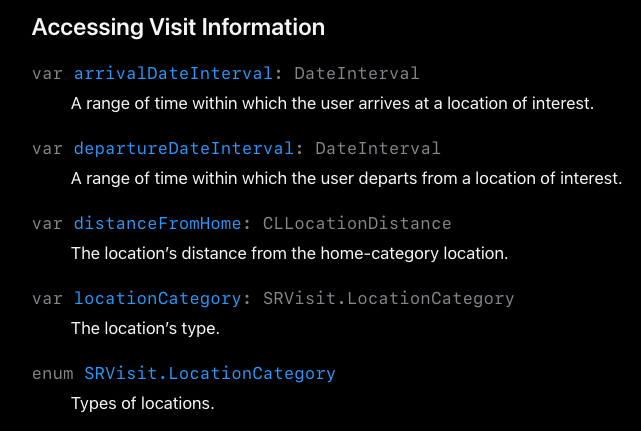

```
visits_gym_elapsedTime
visits_gym_startTime
visits_gym_distance
visits_home_elapsedTime
visits_home_startTime
visits_home_distance
visits_school_startTime
visits_school_elapsedTime
visits_school_distance
visits_unknown_startTime
visits_unknown_elapsedTime
visits_unknown_distance
visits_work_startTime
visits_work_elapsedTime
visits_work_distance
```

### Process

In [4]:
ParticipantIdentifier = []
date_time = []
trial_date = []
time = []

In [5]:
days = [i for i in os.listdir(path ) if i.startswith('RK')]
days.sort()

sample_count = 0

for day in tqdm(days):
    files = os.listdir(path  + day)
    sensors = [i for i in files if i.startswith('sensor')]
    for sensor in sensors:
        # select for sensor
        if sensor == 'sensorkit-visits':
            participants = [i for i in os.listdir(path+day+ '/' + sensor + '/iPhone') if not i.startswith('.')]
            participants.sort()
            for participant in participants: 
                # ParticipantIdentifier = participant
                devices = [i for i in os.listdir(path+day+ '/' + sensor+ '/iPhone/' + participant) if not i.startswith('.')]
                devices.sort()
                for device in devices:
                    data_files = os.listdir(path+day + '/' + sensor+ '/iPhone/' + participant + '/' + device)
                    for subfile in data_files:
                        filepath = path + day + '/' + sensor + '/iPhone/' + participant + '/' + device + '/' + subfile
                        if filepath.endswith('.gz'):
                            try:
                                with gzip.open(filepath, 'r') as fin:
                                    data = json.loads(fin.read().decode('utf-8'))
                                    for i in range(len(data['samples'])):
                                        ParticipantIdentifier.append(participant)
                                        dt = parser.parse(data['samples'][i]['sample']['arrivalDateInterval']['start']) # using the start time
                                        date_time.append(dt)
                                        trial_date.append((dt).date()) # trial day associated with sample (4:45am is when the day flips)
                                        time.append(dt.time())

                                        sample_count+=1
                                    
                            except (OSError, ValueError) as e:  
                                pass

100%|██████████| 55/55 [00:01<00:00, 31.50it/s]


In [6]:
visits_gym_endTime = [np.nan] * sample_count
visits_gym_startTime = [np.nan] * sample_count
visits_gym_elapsed = [np.nan] * sample_count
visits_gym_distance = [np.nan] * sample_count
visits_home_endTime = [np.nan] * sample_count
visits_home_startTime = [np.nan] * sample_count
visits_home_elapsed = [np.nan] * sample_count
visits_home_distance = [np.nan] * sample_count
visits_school_startTime = [np.nan] * sample_count
visits_school_endTime = [np.nan] * sample_count
visits_school_elapsed = [np.nan] * sample_count
visits_school_distance = [np.nan] * sample_count
visits_unknown_startTime = [np.nan] * sample_count
visits_unknown_endTime = [np.nan] * sample_count
visits_unknown_elapsed = [np.nan] * sample_count
visits_unknown_distance = [np.nan] * sample_count
visits_work_startTime = [np.nan] * sample_count
visits_work_endTime = [np.nan] * sample_count
visits_work_elapsed = [np.nan] * sample_count
visits_work_distance = [np.nan] * sample_count

In [7]:
days = [i for i in os.listdir(path) if i.startswith('RK')]
days.sort()

sample_count = 0

for day in tqdm(days):
    files = os.listdir(path + day)
    sensors = [i for i in files if i.startswith('sensor')]
    for sensor in sensors:
        # select for sensor
        if sensor == 'sensorkit-visits':
            participants = [i for i in os.listdir(path + day+ '/' + sensor + '/iPhone') if not i.startswith('.')] # trying to avoid .DS files
            participants.sort()
            for participant in participants:
                devices = [i for i in os.listdir(path +day+ '/' + sensor+ '/iPhone/' + participant) if not i.startswith('.')]
                devices.sort()
                for device in devices:
                    data_files = os.listdir(path +day + '/' + sensor+ '/iPhone/' + participant + '/' + device)
                    for subfile in data_files:
                        filepath = path +day+ '/' + sensor + '/iPhone/' + participant + '/' + device + '/' + subfile
                        if filepath.endswith('.gz'):
                            try:
                                with gzip.open(filepath, 'r') as fin:
                                    data = json.loads(fin.read().decode('utf-8'))
                                    
                                    for i in range(len(data['samples'])):

                                        if data['samples'][i]['sample']['locationCategory'] == 'Gym':
                                            start = parser.parse(data['samples'][i]['sample']['arrivalDateInterval']['start'])
                                            end = parser.parse(data['samples'][i]['sample']['departureDateInterval']['start'])
                                            visits_gym_elapsed[sample_count] = (end-start).total_seconds()/3600
                                            visits_gym_startTime[sample_count] = start
                                            visits_gym_endTime[sample_count] = end
                                            visits_gym_distance[sample_count] = data['samples'][i]['sample']['distanceFromHome']

                                        if data['samples'][i]['sample']['locationCategory'] == 'Home':
                                            start = parser.parse(data['samples'][i]['sample']['arrivalDateInterval']['start'])
                                            end = parser.parse(data['samples'][i]['sample']['departureDateInterval']['start'])
                                            visits_home_elapsed[sample_count] = (end-start).total_seconds()/3600
                                            visits_home_startTime[sample_count] = parser.parse(data['samples'][i]['sample']['arrivalDateInterval']['start'])
                                            visits_home_endTime[sample_count] = parser.parse(data['samples'][i]['sample']['departureDateInterval']['start'])
                                            visits_home_distance[sample_count] = data['samples'][i]['sample']['distanceFromHome']

                                        if data['samples'][i]['sample']['locationCategory'] == 'School':
                                            start = parser.parse(data['samples'][i]['sample']['arrivalDateInterval']['start'])
                                            end = parser.parse(data['samples'][i]['sample']['departureDateInterval']['start'])
                                            visits_school_elapsed[sample_count] = (end-start).total_seconds()/3600
                                            visits_school_startTime[sample_count] = parser.parse(data['samples'][i]['sample']['arrivalDateInterval']['start'])
                                            visits_school_endTime[sample_count] = parser.parse(data['samples'][i]['sample']['departureDateInterval']['start'])
                                            visits_school_distance[sample_count] = data['samples'][i]['sample']['distanceFromHome']

                                        if data['samples'][i]['sample']['locationCategory'] == 'Unknown':
                                            start = parser.parse(data['samples'][i]['sample']['arrivalDateInterval']['start'])
                                            end = parser.parse(data['samples'][i]['sample']['departureDateInterval']['start'])
                                            visits_unknown_elapsed[sample_count] = (end-start).total_seconds()/3600
                                            visits_unknown_startTime[sample_count] = start
                                            visits_unknown_endTime[sample_count] = end
                                            visits_unknown_distance[sample_count] = data['samples'][i]['sample']['distanceFromHome']

                                        if data['samples'][i]['sample']['locationCategory'] == 'Work':
                                            start = parser.parse(data['samples'][i]['sample']['arrivalDateInterval']['start'])
                                            end = parser.parse(data['samples'][i]['sample']['departureDateInterval']['start'])
                                            visits_work_elapsed[sample_count] = (end-start).total_seconds()/3600
                                            visits_work_startTime[sample_count] = parser.parse(data['samples'][i]['sample']['arrivalDateInterval']['start'])
                                            visits_work_endTime[sample_count] = parser.parse(data['samples'][i]['sample']['departureDateInterval']['start'])
                                            visits_work_distance[sample_count] = data['samples'][i]['sample']['distanceFromHome']
                                        
                                        sample_count+=1    

                            except (OSError, ValueError) as e:  
                                pass

100%|██████████| 55/55 [00:02<00:00, 21.21it/s]


In [13]:
from collections import Counter

In [17]:
Counter(visits_gym_startTime)

Counter({nan: 22747})

In [19]:
Counter(visits_work_startTime)

Counter({nan: 20021,
         datetime.datetime(2023, 3, 24, 8, 30, tzinfo=tzoffset(None, -14400)): 23,
         datetime.datetime(2023, 2, 9, 9, 0, tzinfo=tzoffset(None, -18000)): 17,
         datetime.datetime(2023, 3, 15, 8, 30, tzinfo=tzoffset(None, -14400)): 13,
         datetime.datetime(2023, 2, 8, 8, 15, tzinfo=tzoffset(None, -18000)): 11,
         datetime.datetime(2023, 2, 27, 9, 45, tzinfo=tzoffset(None, -18000)): 11,
         datetime.datetime(2023, 3, 3, 8, 15, tzinfo=tzoffset(None, -18000)): 11,
         datetime.datetime(2023, 1, 30, 9, 15, tzinfo=tzoffset(None, -18000)): 11,
         datetime.datetime(2023, 2, 10, 8, 30, tzinfo=tzoffset(None, -18000)): 11,
         datetime.datetime(2023, 3, 8, 9, 30, tzinfo=tzoffset(None, -18000)): 11,
         datetime.datetime(2023, 3, 17, 8, 45, tzinfo=tzoffset(None, -14400)): 11,
         datetime.datetime(2023, 2, 6, 9, 30, tzinfo=tzoffset(None, -18000)): 10,
         datetime.datetime(2023, 1, 26, 9, 0, tzinfo=tzoffset(None, -180

In [146]:
dict = {
    'ParticipantIdentifier': ParticipantIdentifier,
    'date_time': date_time,
    'trial_date': trial_date,
    'time': time,

    'visits_gym_startTime': visits_gym_startTime,
    'visits_gym_endTime': visits_gym_endTime,
    'visits_gym_elapsed': visits_gym_elapsed,
    'visits_gym_distance': visits_gym_distance,
    'visits_home_startTime': visits_home_startTime,
    'visits_home_endTime': visits_home_endTime,    
    'visits_home_elapsed': visits_home_elapsed,
    'visits_home_distance': visits_home_distance,
    'visits_school_startTime': visits_school_startTime,
    'visits_school_endTime': visits_school_endTime,
    'visits_school_elapsed': visits_school_elapsed,
    'visits_school_distance': visits_school_distance,
    'visits_unknown_startTime': visits_unknown_startTime,
    'visits_unknown_endTime': visits_unknown_endTime,
    'visits_unknown_elapsed': visits_unknown_elapsed,
    'visits_unknown_distance': visits_unknown_distance,
    'visits_work_startTime': visits_work_startTime,
    'visits_work_endTime': visits_work_endTime,
    'visits_work_elapsed': visits_work_elapsed,
    'visits_work_distance': visits_work_distance
}

In [147]:
df = pd.DataFrame(dict)
df.head(3)

,ParticipantIdentifier,date_time,trial_date,time,visits_gym_startTime,visits_gym_endTime,visits_gym_elapsed,visits_gym_distance,visits_home_startTime,visits_home_endTime,...,visits_school_elapsed,visits_school_distance,visits_unknown_startTime,visits_unknown_endTime,visits_unknown_elapsed,visits_unknown_distance,visits_work_startTime,visits_work_endTime,visits_work_elapsed,visits_work_distance
0,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-03 18:30:00-05:00,2023-02-03,18:30:00,NaN,NaN,NaN,NaN,2023-02-03 18:30:00-05:00,2023-02-05 11:30:00-05:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-03 18:30:00-05:00,2023-02-03,18:30:00,NaN,NaN,NaN,NaN,2023-02-03 18:30:00-05:00,2023-02-05 11:30:00-05:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-06 07:45:00-05:00,2023-02-06,07:45:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-06 07:45:00-05:00,2023-02-06 18:00:00-05:00,10.25,10827.529007


In [148]:
# check for duplicated rows
# sometimes data is saved multiple times on different days...

df.duplicated().sum()

8768

In [149]:
rows_pre = df.shape[0]

# remove duplicate rows, keeping last
df = df.drop_duplicates(keep='last').reset_index(drop=True)
# df = df[~df.duplicated(keep='last')]

rows_post = df.shape[0]
rows_removed = rows_pre - rows_post
# Log cleaning
print(f'Deleting duplicate rows (keeping last) removed {rows_removed} rows, or {(rows_removed/rows_pre)*100:.1f}%')
logging.info(f'{description} - RUN {run_num} - Deleting duplicate rows (keeping last) removed {rows_removed} rows, or {(rows_removed/rows_pre)*100:.1f}%')

Deleting duplicate rows (keeping last) removed 8768 rows, or 38.5%


### EDA

In [58]:
efa_cols = [col for col in df.columns if not col.endswith('Time')]

In [59]:
profile = ProfileReport(df[efa_cols].iloc[:,4:], title=f"SK Visits Run {run_num} | Pandas Profiling Report", explorative=True)
profile.to_file(eda_reports_path + f"passive_sk_visits_run{run_num}.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Clean

There are some issues that we attempt to address with cleaning for the **Visits** data.

---

**Multiple Days**

We also have an issue where the elapsed time spans multiple days. This is problematic for matching individual days for locations so we did the following:

1. If the `...endTime` is *not* on the same date as the `...startTime` for a category (by definition it could only be one category per entry) then:
    - Create a new row
    - Copy all information from the existing row to the new row except `trial_date`
    - Add one day to `trial_date`
    - Repeat if the new `trial_date` and `...endTime` are still not on the same date
    - Add all the new rows to the existing dataframe

2. With the new dataframe recalculate the `...startTime` and `...endTime` with the following logic:
    - if the `trial_date` is **after** the `...startTime` this means that the visit started the prior day and then continued. In this case we set the `...startTime` to midnight of the current day (`datetime.time(0, 0, 0)`)
    - if the `trial_date` is **before** the `...endTime` this means that the visit continued past the current `trial_date`. In this case we set the `...endTime` to the last minute of the current day (`datetime.time(23, 59, 59)`)

3. This also means that the `elapsed` times are going to be wrong for those days that spanned multiple days.

---

**Elapsed Time = 0**

If elapsed time = 0, this means that the person arrived and left in the same time interval (see [`SRVisit` documentation](https://developer.apple.com/documentation/sensorkit/srvisit)).

Given that the time intervals are 15 minutes in duration 0 is not the most likely number for the elapsed time at the location. We set the value to 7.5 minutes, which is .125 hours.

---

**Time Change Artifacts**
There were some negative elapsed values which was confusing but then it became clear that these were happening when the time had changed on May 12 (for run 2). There were only 4 cases in run 2 so I simply added one hour to those 4 values.

---

**Distances**

Some distances are as large as 9000km which probably entails a trip to another continent. This is not feasible for `work` so I am capping the work distance at 100km. For `run 2` this is 31 entries for one participant.

I am not cleaning the distance for the `unknown` category which has equally large values, but I am creating a flag column

In [150]:
# MULTIPLE DAYS CORRECTION #

# For start and end times that span multiple days create new days/rows for the days covered
def parse_time(t):
    return t if pd.notnull(t) else None

# Step 1: Identify all pairs of columns that end with 'startTime' and 'endTime'
time_columns = [col for col in df.columns if 'Time' in col]
start_time_columns = [col for col in time_columns if 'start' in col]
end_time_columns = [col for col in time_columns if 'end' in col]

# Step 2: Create a new dataframe to hold the results
new_rows = []

# Loop through each row to check for differences in days and create new rows if needed
for index, row in df.iterrows():
    # For each pair of start and end time columns
    for start_col, end_col in zip(start_time_columns, end_time_columns):
        start_time = parse_time(row[start_col])
        end_time = parse_time(row[end_col])
        
        # If both times are not null and they are on different days
        if start_time and end_time and (end_time.date() > start_time.date()):
            # Calculate the number of days between the two times
            days_diff = (end_time.date() - start_time.date()).days
            
            # Step 3: For each day difference, create a duplicate row with adjusted trial_date
            for n in range(1, days_diff + 1):
                new_row = row.copy()
                new_row['trial_date'] = row['trial_date'] + datetime.timedelta(days=n)
                #new_row['trial_date'] = new_trial_date.date().isoformat()
                new_rows.append(new_row)

# Convert the list of Series objects into a DataFrame
new_rows_df = pd.DataFrame(new_rows)

# Check if we have any new rows to add
if not new_rows_df.empty:
    # Step 4: Append the new rows to the original dataframe
    df = pd.concat([df, new_rows_df], ignore_index=True)

In [151]:
# TIME CORRECTION FOR UPDATED ROWS #
# datetime time objects to use for updating times
day_start = datetime.time(0, 0, 0)
day_end = datetime.time(23, 59, 59)

# Function to adjust times based on the trial_date
def adjust_times(row):
    for start_col, end_col in zip(start_time_columns, end_time_columns):
        start_time = parse_time(row[start_col])
        end_time = parse_time(row[end_col])
        trial_date = row['trial_date']
        
        # If both times are not null and they are on different days
        if start_time and end_time:
            # Adjust start_time if trial_date is after the start_time
            if trial_date > start_time.date():
                row[start_col] = datetime.datetime.combine(trial_date, day_start, tzinfo=row[start_col].tzinfo)
            
            # Adjust end_time if trial_date is before the end_time
            if trial_date < end_time.date():
                row[end_col] = datetime.datetime.combine(trial_date, day_end, tzinfo=row[end_col].tzinfo)
    return row

# Apply the function to each row
df = df.apply(adjust_times, axis=1)

# Display the modified dataframe to check if the changes are applied
df.tail()


,ParticipantIdentifier,date_time,trial_date,time,visits_gym_startTime,visits_gym_endTime,visits_gym_elapsed,visits_gym_distance,visits_home_startTime,visits_home_endTime,...,visits_school_elapsed,visits_school_distance,visits_unknown_startTime,visits_unknown_endTime,visits_unknown_elapsed,visits_unknown_distance,visits_work_startTime,visits_work_endTime,visits_work_elapsed,visits_work_distance
18922,c61e40df-fa64-4037-838e-65d912521dc2,2023-04-15 15:00:00-04:00,2023-04-18,15:00:00,NaN,NaN,NaN,NaN,2023-04-18 00:00:00-04:00,2023-04-18 23:59:59-04:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18923,c61e40df-fa64-4037-838e-65d912521dc2,2023-04-15 15:00:00-04:00,2023-04-19,15:00:00,NaN,NaN,NaN,NaN,2023-04-19 00:00:00-04:00,2023-04-19 11:45:00-04:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18924,c61e40df-fa64-4037-838e-65d912521dc2,2023-04-19 16:15:00-04:00,2023-04-20,16:15:00,NaN,NaN,NaN,NaN,2023-04-20 00:00:00-04:00,2023-04-20 07:45:00-04:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18925,c61e40df-fa64-4037-838e-65d912521dc2,2023-04-21 22:30:00-04:00,2023-04-22,22:30:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2023-04-22 00:00:00-04:00,2023-04-22 00:45:00-04:00,2.25,18848.207847,NaN,NaN,NaN,NaN
18926,c61e40df-fa64-4037-838e-65d912521dc2,2023-04-20 22:00:00-04:00,2023-04-21,22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2023-04-21 00:00:00-04:00,2023-04-21 00:45:00-04:00,2.75,19265.535473,NaN,NaN,NaN,NaN


In [152]:
# ELASPED TIME CORRECTION #

# Function to calculate elapsed time in hours
def calculate_elapsed_time(row, start_col, end_col):
    start_time = row[start_col]
    end_time = row[end_col]
    
    if pd.isna(start_time) or pd.isna(end_time):
        return np.nan
    
    # # Convert string to datetime
    # start_time = datetime.fromisoformat(start_time)
    # end_time = datetime.fromisoformat(end_time)
    
    # Calculate elapsed time in hours
    elapsed_time = (end_time - start_time).total_seconds() / 3600
    return elapsed_time

# Columns for different visit types
visit_types = ['gym', 'home', 'school', 'unknown', 'work']

# Calculate elapsed time for each visit type
for visit_type in visit_types:
    start_col = f'visits_{visit_type}_startTime'
    end_col = f'visits_{visit_type}_endTime'
    elapsed_col = f'visits_{visit_type}_elapsed'
    
    df[elapsed_col] = df.apply(calculate_elapsed_time, axis=1, args=(start_col, end_col))


In [153]:
# ZERO ELAPSED TIME CORRECTION #

# Find all columns that contain 'elapsed' in their name
elapsed_columns = [col for col in df.columns if 'elapsed' in col]

zero_vals = df[elapsed_columns].eq(0).sum().sum()

# Check if any of these columns contain values of 0 and change those cell values to .125 hours (7.5 minutes)
for col in elapsed_columns:
    df.loc[df[col] == 0, col] = .125

# log changes    
logging.info(f'{description} - {zero_vals} zero values in ELAPSED columns changed to .125 hours (7.5 minutes)')

In [154]:
# Time changed on March 12 which led to a few people having time offsets that throw the elapsed time calculation off. 
df.loc[df['visits_home_elapsed']<0]

,ParticipantIdentifier,date_time,trial_date,time,visits_gym_startTime,visits_gym_endTime,visits_gym_elapsed,visits_gym_distance,visits_home_startTime,visits_home_endTime,...,visits_school_elapsed,visits_school_distance,visits_unknown_startTime,visits_unknown_endTime,visits_unknown_elapsed,visits_unknown_distance,visits_work_startTime,visits_work_endTime,visits_work_elapsed,visits_work_distance
10266,38b86bfc-579d-4155-93e0-f44afdca101a,2023-03-11 23:00:00-05:00,2023-03-11,23:00:00,NaN,NaN,NaN,NaN,2023-03-11 23:00:00-05:00,2023-03-11 23:59:59-04:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10424,40538a74-9b24-4ef5-8995-dc341a005aac,2023-03-11 23:15:00-05:00,2023-03-11,23:15:00,NaN,NaN,NaN,NaN,2023-03-11 23:15:00-05:00,2023-03-11 23:59:59-04:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10510,ad7fb561-1111-49bf-9663-6ab339aa53ad,2023-03-11 23:15:00-05:00,2023-03-11,23:15:00,NaN,NaN,NaN,NaN,2023-03-11 23:15:00-05:00,2023-03-11 23:59:59-04:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10713,dfef360e-27cb-4d35-bb4a-d6633803eb96,2023-03-11 23:00:00-05:00,2023-03-11,23:00:00,NaN,NaN,NaN,NaN,2023-03-11 23:00:00-05:00,2023-03-11 23:59:59-04:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
# FIX TIME CHANGE ERRORS #

# Define a function to check tzinfo for start and end times and update the elapsed column
def check_tz_and_update_elapsed(row):
    for col in df.columns:
        if 'startTime' in col:
            start_col = col
            end_col = col.replace('startTime', 'endTime')
            elapsed_col = col.replace('startTime', 'elapsed')

            # Check if both startTime and endTime are not NaN and elapsed column exists
            if pd.notna(row[start_col]) and pd.notna(row[end_col]) and elapsed_col in row:
                start_time = pd.to_datetime(row[start_col])
                end_time = pd.to_datetime(row[end_col])
    
                # Check if tzinfo is the same for both start and end times
                if start_time.tzinfo != end_time.tzinfo:
                    if run_num == 1: # fall cohort, need to subtract an hour
                        row[elapsed_col] -= 1
                    if run_num == 2: # spring cohort, need to add an hour
                        row[elapsed_col] += 1
    
    return row

    
# Apply the function to each row of the DataFrame
df = df.apply(check_tz_and_update_elapsed, axis=1)

In [156]:
# CLEAN WORK VALUES #
df.loc[df['visits_work_distance']>100000, 'visits_work_distance'] = 100000

# FLAG UNKNOWN VALUES # 
df['visits_unknown_distance_flag'] = False
df.loc[df['visits_unknown_distance'] > 100000, 'visits_unknown_distance_flag'] = True

In [157]:
# check for duplicated rows
# Not sure how duplicates would have reappeared?

df.duplicated().sum()

89

In [158]:
# remove duplicate rows, keeping last
df = df.drop_duplicates(keep='last')

In [69]:
# Rerun EFA
profile = ProfileReport(df[efa_cols].iloc[:,4:], title=f"SK Visits Run {run_num} - Cleaned | Pandas Profiling Report", explorative=True)
profile.to_file(eda_reports_path + f"passive_sk_visits_run{run_num}_clean.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Save

In [159]:
# Reset index
df = df.reset_index(drop=True)

In [160]:
# Rename columns
df.columns = list(df.columns[:3]) + ['passive_sk_' + col for col in df.columns[3:]]

In [161]:
df = df.rename(columns={'passive_sk_time': 'passive_sk_visits_time'})

In [162]:
df.head(2)

,ParticipantIdentifier,date_time,trial_date,passive_sk_visits_time,passive_sk_visits_gym_startTime,passive_sk_visits_gym_endTime,passive_sk_visits_gym_elapsed,passive_sk_visits_gym_distance,passive_sk_visits_home_startTime,passive_sk_visits_home_endTime,...,passive_sk_visits_school_distance,passive_sk_visits_unknown_startTime,passive_sk_visits_unknown_endTime,passive_sk_visits_unknown_elapsed,passive_sk_visits_unknown_distance,passive_sk_visits_work_startTime,passive_sk_visits_work_endTime,passive_sk_visits_work_elapsed,passive_sk_visits_work_distance,passive_sk_visits_unknown_distance_flag
0,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-06 07:45:00-05:00,2023-02-06,07:45:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2023-02-06 07:45:00-05:00,2023-02-06 18:00:00-05:00,10.25,10827.529007,False
1,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-07 08:00:00-05:00,2023-02-07,08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2023-02-07 08:00:00-05:00,2023-02-07 18:00:00-05:00,10.00,10827.529007,False


In [163]:
df.columns

Index(['ParticipantIdentifier', 'date_time', 'trial_date',
       'passive_sk_visits_time', 'passive_sk_visits_gym_startTime',
       'passive_sk_visits_gym_endTime', 'passive_sk_visits_gym_elapsed',
       'passive_sk_visits_gym_distance', 'passive_sk_visits_home_startTime',
       'passive_sk_visits_home_endTime', 'passive_sk_visits_home_elapsed',
       'passive_sk_visits_home_distance', 'passive_sk_visits_school_startTime',
       'passive_sk_visits_school_endTime', 'passive_sk_visits_school_elapsed',
       'passive_sk_visits_school_distance',
       'passive_sk_visits_unknown_startTime',
       'passive_sk_visits_unknown_endTime',
       'passive_sk_visits_unknown_elapsed',
       'passive_sk_visits_unknown_distance',
       'passive_sk_visits_work_startTime', 'passive_sk_visits_work_endTime',
       'passive_sk_visits_work_elapsed', 'passive_sk_visits_work_distance',
       'passive_sk_visits_unknown_distance_flag'],
      dtype='object')

In [164]:
# save to csv
if run_num == 1:
    df.to_csv(save_path + 'run1_sk_visits.csv', index=False)
if run_num ==2:
    df.to_csv(save_path + 'run2_sk_visits.csv', index=False)

## Telephony

### Process

In [165]:
del(df)

In [166]:
# identification
ParticipantIdentifier = []
date_time = []
trial_date = []
time = []
duration = []

In [167]:
days = [i for i in os.listdir(path) if i.startswith('RK')]
days.sort()

sample_count = 0

for day in tqdm(days):
    files = os.listdir(path + day)
    sensors = [i for i in files if i.startswith('sensor')]
    for sensor in sensors:
        # select for sensor
        if sensor == 'sensorkit-speech-telephony':
            participants = [i for i in os.listdir(path + day + '/' + sensor + '/iPhone') if not i.startswith('.')]
            participants.sort()
            for participant in participants: 
                # ParticipantIdentifier = participant
                devices = [i for i in os.listdir(path + day + '/' + sensor+ '/iPhone/' + participant) if not i.startswith('.')]
                devices.sort()
                for device in devices:
                    data_files = os.listdir(path + day + '/' + sensor+ '/iPhone/' + participant + '/' + device)
                    for subfile in data_files:
                        filepath = path + day + '/' + sensor + '/iPhone/' + participant + '/' + device + '/' + subfile
                        if filepath.endswith('.gz'):
                            try:
                                with gzip.open(filepath, 'r') as fin:
                                    data = json.loads(fin.read().decode('utf-8'))
                                    for i in range(len(data['samples'])):
                                        ParticipantIdentifier.append(participant)
                                        dt = parser.parse(data['samples'][i]['timestamp']) # str -> datetime of sample
                                        date_time.append(dt)
                                        trial_date.append((dt + datetime.timedelta(hours = -4.75)).date()) # trial day associated with sample (4:45am is when the day flips)
                                        time.append(dt.time())

                                        sample_count+=1
                                    
                            except (OSError, ValueError) as e:  
                                pass

100%|██████████| 55/55 [04:14<00:00,  4.62s/it]  


In [168]:
speakingRate = [np.nan] * sample_count
averagePauseDuration = [np.nan] * sample_count
voiceAnalytics_jitter = [[] for _ in range(sample_count)]
voiceAnalytics_shimmer = [[] for _ in range(sample_count)]
voiceAnalytics_pitch = [[] for _ in range(sample_count)]
voiceAnalytics_voicing = [[] for _ in range(sample_count)]
speechDuration = [np.nan] * sample_count

In [169]:
days = [i for i in os.listdir(path) if i.startswith('RK')]
days.sort()

sample_count = 0

for day in tqdm(days):
    files = os.listdir(path + day)
    sensors = [i for i in files if i.startswith('sensor')]
    for sensor in sensors:
        # select for sensor
        if sensor == 'sensorkit-speech-telephony':
            participants = [i for i in os.listdir(path + day+ '/' + sensor + '/iPhone') if not i.startswith('.')]
            participants.sort()
            for participant in participants:
                # ParticipantIdentifier = participant
                devices = [i for i in os.listdir(path + day+ '/' + sensor+ '/iPhone/' + participant) if not i.startswith('.')]
                devices.sort()
                for device in devices:
                    data_files = os.listdir(path + day + '/' + sensor+ '/iPhone/' + participant + '/' + device)
                    for subfile in data_files:
                        filepath = path + day + '/' + sensor + '/iPhone/' + participant + '/' + device + '/' + subfile
                        if filepath.endswith('.gz'):
                            try:
                                with gzip.open(filepath, 'r') as fin:
                                    data = json.loads(fin.read().decode('utf-8'))
                                    for i in range(len(data['samples'])):
                                        speakingRate[sample_count] = data['samples'][i]['sample']['speechRecognitionMetadata']['speakingRate']
                                        averagePauseDuration[sample_count] = data['samples'][i]['sample']['speechRecognitionMetadata']['averagePauseDuration']
                                        speechDuration[sample_count] = data['samples'][i]['sample']['speechRecognitionMetadata']['speechDuration']
                                        # if data['samples'][i]['sample']['speechRecognitionMetadata']['voiceAnalytics'] != None:
                                        #     voiceAnalytics_jitter[sample_count] = data['samples'][i]['sample']['speechRecognitionMetadata']['voiceAnalytics']['jitter']['acousticFeatureValuePerFrame']
                                        #     voiceAnalytics_shimmer[sample_count] = data['samples'][i]['sample']['speechRecognitionMetadata']['voiceAnalytics']['shimmer']['acousticFeatureValuePerFrame']
                                        #     voiceAnalytics_pitch[sample_count] = data['samples'][i]['sample']['speechRecognitionMetadata']['voiceAnalytics']['pitch']['acousticFeatureValuePerFrame']
                                        #     voiceAnalytics_voicing[sample_count] = data['samples'][i]['sample']['speechRecognitionMetadata']['voiceAnalytics']['voicing']['acousticFeatureValuePerFrame']

                                        sample_count+=1

                            except (OSError, ValueError) as e:  
                                pass

100%|██████████| 55/55 [03:56<00:00,  4.29s/it]  


In [170]:
dict = {
    'ParticipantIdentifier': ParticipantIdentifier,
    'date_time': date_time,
    'trial_date': trial_date,
    'time': time,

    'speakingRate': speakingRate,
    'averagePauseDuration': averagePauseDuration,
    'speechDuration': speechDuration,
    # 'voiceAnalytics_jitter': voiceAnalytics_jitter,
    # 'voiceAnalytics_shimmer': voiceAnalytics_shimmer,
    # 'voiceAnalytics_pitch': voiceAnalytics_pitch,
    # 'voiceAnalytics_voicing': voiceAnalytics_voicing
}

In [171]:
df = pd.DataFrame(dict)
df.head(3)

,ParticipantIdentifier,date_time,trial_date,time,speakingRate,averagePauseDuration,speechDuration
0,0151d9f1-1644-4437-805e-02f5e244a690,2023-03-02 22:00:06-05:00,2023-03-02,22:00:06,114.649682,0.369143,18.84
1,0151d9f1-1644-4437-805e-02f5e244a690,2023-03-02 22:00:06-05:00,2023-03-02,22:00:06,119.354839,0.345000,18.60
2,0151d9f1-1644-4437-805e-02f5e244a690,2023-03-02 22:00:06-05:00,2023-03-02,22:00:06,102.564103,0.390000,1.24


In [172]:
df.shape

(803573, 7)

In [173]:
# check for duplicated rows
# sometimes data is saved multiple times on different days...

df.duplicated().sum()

29357

In [174]:
# remove duplicate rows, keeping last
df = df.drop_duplicates(keep='last')

In [175]:
df.head()

,ParticipantIdentifier,date_time,trial_date,time,speakingRate,averagePauseDuration,speechDuration
3,0151d9f1-1644-4437-805e-02f5e244a690,2023-03-02 21:59:48-05:00,2023-03-02,21:59:48,120.805369,0.315000,1.49
4,0151d9f1-1644-4437-805e-02f5e244a690,2023-03-02 21:59:48-05:00,2023-03-02,21:59:48,250.000000,0.170000,0.48
5,0151d9f1-1644-4437-805e-02f5e244a690,2023-03-02 22:00:06-05:00,2023-03-02,22:00:06,114.649682,0.369143,18.84
6,0151d9f1-1644-4437-805e-02f5e244a690,2023-03-02 22:00:06-05:00,2023-03-02,22:00:06,119.354839,0.345000,18.60
7,0151d9f1-1644-4437-805e-02f5e244a690,2023-03-02 22:00:06-05:00,2023-03-02,22:00:06,102.564103,0.390000,1.24


### EDA

In [86]:
profile = ProfileReport(df.iloc[:,3:], title=f"SK Telephony Run {run_num} | Pandas Profiling Report", explorative=True)
profile.to_file(eda_reports_path + f"passive_sk_telephony_run{run_num}.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Clean

There are negative values for average pause duration.

They are all -1.0, which makes me think that perhaps they indicate no pauses, especially since most of the `speechDuration` values are less than 1

In [176]:
df[(df['averagePauseDuration']<0) & (df['speechDuration']<1)].shape[0] / df[(df['averagePauseDuration']<0)].shape[0]

0.9455374358639171

In [177]:
# Rename columns
df.columns = list(df.columns[:3]) + ['passive_sk_telephony_' + col for col in df.columns[3:]]

In [178]:
df.head(2)

,ParticipantIdentifier,date_time,trial_date,passive_sk_telephony_time,passive_sk_telephony_speakingRate,passive_sk_telephony_averagePauseDuration,passive_sk_telephony_speechDuration
3,0151d9f1-1644-4437-805e-02f5e244a690,2023-03-02 21:59:48-05:00,2023-03-02,21:59:48,120.805369,0.315,1.49
4,0151d9f1-1644-4437-805e-02f5e244a690,2023-03-02 21:59:48-05:00,2023-03-02,21:59:48,250.000000,0.170,0.48


### Save

In [179]:
# save to csv
if run_num == 1:
    df.to_csv(save_path + 'run1_sk_telephony_small.csv', index=False)
if run_num ==2:
    df.to_csv(save_path + 'run2_sk_telephony_small.csv', index=False)

## Messages

### Process

In [180]:
del(df)

In [181]:
# identification
ParticipantIdentifier = []
date_time = []
trial_date = []
time = []
duration = []

In [182]:
days = [i for i in os.listdir(path) if i.startswith('RK')]
days.sort()

sample_count = 0

for day in tqdm(days):
    files = os.listdir(path + day)
    sensors = [i for i in files if i.startswith('sensor')]
    for sensor in sensors:
        # select for sensor
        if sensor == 'sensorkit-messages-usage':
            participants = [i for i in os.listdir(path + day + '/' + sensor + '/iPhone') if not i.startswith('.')]
            participants.sort()
            for participant in participants: 
                # ParticipantIdentifier = participant
                devices = [i for i in os.listdir(path + day + '/' + sensor+ '/iPhone/' + participant) if not i.startswith('.')]
                devices.sort()
                for device in devices:
                    data_files = os.listdir(path + day + '/' + sensor+ '/iPhone/' + participant + '/' + device)
                    for subfile in data_files:
                        filepath = path + day + '/' + sensor + '/iPhone/' + participant + '/' + device + '/' + subfile
                        if filepath.endswith('.gz'):
                            try:
                                with gzip.open(filepath, 'r') as fin:
                                    data = json.loads(fin.read().decode('utf-8'))
                                    for i in range(len(data['samples'])):
                                        ParticipantIdentifier.append(participant)
                                        dt = parser.parse(data['samples'][i]['timestamp']) # str -> datetime of sample
                                        date_time.append(dt)
                                        trial_date.append((dt + datetime.timedelta(hours = -4.75)).date()) # trial day associated with sample (4:45am is when the day flips)
                                        time.append(dt.time())
                                        duration.append(data['samples'][i]['sample']['duration'])

                                        sample_count+=1
                                    
                            except (OSError, ValueError) as e:  
                                pass

100%|██████████| 55/55 [00:04<00:00, 11.29it/s]


In [183]:
messages_incoming = [np.nan] * sample_count
messages_outgoing = [np.nan] * sample_count
messages_uniqueContacts = [np.nan] * sample_count
calls_incoming = [np.nan] * sample_count
calls_outgoing = [np.nan] * sample_count
calls_duration = [np.nan] * sample_count
calls_uniqueContacts = [np.nan] * sample_count

In [184]:
days = [i for i in os.listdir(path) if i.startswith('RK')]
days.sort()

sample_count = 0

for day in tqdm(days):
    files = os.listdir(path + day)
    sensors = [i for i in files if i.startswith('sensor')]
    for sensor in sensors:
        # select for sensor
        if sensor == 'sensorkit-messages-usage':
            participants = [i for i in os.listdir(path + day + '/' + sensor + '/iPhone') if not i.startswith('.')]
            participants.sort()
            for participant in participants: 
                # ParticipantIdentifier = participant
                devices = [i for i in os.listdir(path + day + '/' + sensor+ '/iPhone/' + participant) if not i.startswith('.')]
                devices.sort()
                for device in devices:
                    data_files = os.listdir(path + day + '/' + sensor+ '/iPhone/' + participant + '/' + device)
                    for subfile in data_files:
                        filepath = path + day + '/' + sensor + '/iPhone/' + participant + '/' + device + '/' + subfile
                        if filepath.endswith('.gz'):
                            try:
                                with gzip.open(filepath, 'r') as fin:
                                    data = json.loads(fin.read().decode('utf-8'))
                                    for i in range(len(data['samples'])):
                                        # check if phone (vs message)
                                        if 'totalIncomingCalls' in data['samples'][i]['sample']:
                                            calls_incoming[sample_count] = data['samples'][i]['sample']['totalIncomingCalls']
                                            calls_outgoing[sample_count] = data['samples'][i]['sample']['totalOutgoingCalls']
                                            calls_duration[sample_count] = data['samples'][i]['sample']['totalPhoneCallDuration']
                                            calls_uniqueContacts[sample_count] = data['samples'][i]['sample']['totalUniqueContacts']
                                        else:
                                            messages_incoming[sample_count] = data['samples'][i]['sample']['totalIncomingMessages']
                                            messages_outgoing[sample_count] = data['samples'][i]['sample']['totalOutgoingMessages']
                                            messages_uniqueContacts[sample_count] = data['samples'][i]['sample']['totalUniqueContacts']

                                        sample_count+=1

                            except (OSError, ValueError) as e:  
                                pass

100%|██████████| 55/55 [00:00<00:00, 65.45it/s]


In [185]:
dict = {
    'ParticipantIdentifier': ParticipantIdentifier,
    'date_time': date_time,
    'trial_date': trial_date,
    'time': time,
    'messageCall_timespan': duration,

    'messages_incoming': messages_incoming,
    'messages_outgoing': messages_outgoing,
    'messages_uniqueContacts': messages_uniqueContacts,
    'calls_incoming': calls_incoming,
    'calls_outgoing': calls_outgoing,
    'calls_duration': calls_duration,
    'calls_uniqueContacts': calls_uniqueContacts
}

In [186]:
df = pd.DataFrame(dict)
df.head(3)

,ParticipantIdentifier,date_time,trial_date,time,messageCall_timespan,messages_incoming,messages_outgoing,messages_uniqueContacts,calls_incoming,calls_outgoing,calls_duration,calls_uniqueContacts
0,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-02 18:00:00-05:00,2023-02-02,18:00:00,1800,1.0,0.0,1.0,NaN,NaN,NaN,NaN
1,0151d9f1-1644-4437-805e-02f5e244a690,2023-03-03 00:00:00-05:00,2023-03-02,00:00:00,86400,NaN,NaN,NaN,2.0,1.0,467.341473,1.0
2,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-16 18:00:00-05:00,2023-02-16,18:00:00,1800,1.0,0.0,1.0,NaN,NaN,NaN,NaN


In [187]:
# check for duplicated rows
# sometimes data is saved multiple times on different days...

df.duplicated().sum()

8284

In [188]:
# remove duplicate rows, keeping last
df = df.drop_duplicates(keep='last')

### EDA

In [101]:
profile = ProfileReport(df.iloc[:,3:], title=f"SK Messages Run {run_num} | Pandas Profiling Report", explorative=True)
profile.to_file(eda_reports_path + f"passive_sk_messages_run{run_num}.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Clean

Note that `messageCall_timespan` is either 30 minutes (1800) for messages or 24 hours (86400) for calls.

Also in **run 2** there was someone who sent 259 messages in 30 minutes. I think this is possible but still remarkable.

In [189]:
df[df['messages_outgoing']>250]

,ParticipantIdentifier,date_time,trial_date,time,messageCall_timespan,messages_incoming,messages_outgoing,messages_uniqueContacts,calls_incoming,calls_outgoing,calls_duration,calls_uniqueContacts
52301,ad796fac-c95e-4858-bcd9-8c2740b89077,2023-03-08 21:30:01-05:00,2023-03-08,21:30:01,1800,92.0,259.0,3.0,NaN,NaN,NaN,NaN


In [190]:
# Rename columns
df.columns = list(df.columns[:3]) + ['passive_sk_' + col for col in df.columns[3:]]

In [191]:
df = df.rename(columns={'passive_sk_time': 'passive_sk_messageCall_time'})

In [192]:
df.head(3)

,ParticipantIdentifier,date_time,trial_date,passive_sk_messageCall_time,passive_sk_messageCall_timespan,passive_sk_messages_incoming,passive_sk_messages_outgoing,passive_sk_messages_uniqueContacts,passive_sk_calls_incoming,passive_sk_calls_outgoing,passive_sk_calls_duration,passive_sk_calls_uniqueContacts
7,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-03 15:30:00-05:00,2023-02-03,15:30:00,1800,0.0,3.0,1.0,NaN,NaN,NaN,NaN
8,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-03 17:30:00-05:00,2023-02-03,17:30:00,1800,2.0,0.0,1.0,NaN,NaN,NaN,NaN
13,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-16 18:00:00-05:00,2023-02-16,18:00:00,1800,1.0,0.0,1.0,NaN,NaN,NaN,NaN


### Save

In [193]:
# save to csv
if run_num == 1:
    df.to_csv(save_path + 'run1_sk_messagesCalls.csv', index=False)
if run_num ==2:
    df.to_csv(save_path + 'run2_sk_messagesCalls.csv', index=False)